# Importando dados Titanic
importação dos modulos a serem usado e do arquivo_data.csv: https://www.kaggle.com/c/titanic/data

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

df_t = pd.read_csv("titanic_data.csv")


## visualização dos dados
visualização dos dados para analisar valores a serem tranformados e reparados do data_set

In [17]:
df_t.head()
df_t.describe()
df_t.shape
df_t.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# Manipulação dos dados
descarte da coluna "cabin" onde contem um numero alto de valores faltantes e convertendo as colunas para formato minusculo

In [18]:
df_t = df_t.drop("Cabin",axis=1)
df_t.head()
new_columns = [df.lower() for df in df_t.columns]
df_t.columns = new_columns
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
passengerid    891 non-null int64
survived       891 non-null int64
pclass         891 non-null int64
name           891 non-null object
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
ticket         891 non-null object
fare           891 non-null float64
embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


# Preenchendo linhas com valores NaN
preenchimentos de valores NaN na coluna "Age", com a média geral de "Age"

In [19]:
df_age_mean = df_t['age'].mean()
df_t['age'] = df_t['age'].fillna(round(df_age_mean))
df_t.isnull().any()
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
passengerid    891 non-null int64
survived       891 non-null int64
pclass         891 non-null int64
name           891 non-null object
sex            891 non-null object
age            891 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
ticket         891 non-null object
fare           891 non-null float64
embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


# Removendo linhas com NaN valores
remoção das linhas da coluna "Embarked", por motivos onde só há dois valores faltante e que nao sao de importancia.

In [20]:
df_t = df_t.dropna()
df_t['age'] = df_t['age'].astype(int)
df_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
passengerid    889 non-null int64
survived       889 non-null int64
pclass         889 non-null int64
name           889 non-null object
sex            889 non-null object
age            889 non-null int32
sibsp          889 non-null int64
parch          889 non-null int64
ticket         889 non-null object
fare           889 non-null float64
embarked       889 non-null object
dtypes: float64(1), int32(1), int64(5), object(4)
memory usage: 79.9+ KB


# Criando uma coluna
classificação da idade faixa etaria 'aclass' onde define a faixa etaria pela idade

In [21]:
dfa = df_t.query('age > 18').copy()
dfk = df_t.query('age < 12').copy()
dft = df_t.query('age >= 12 and age <= 18').copy()
dfa.loc[:,'aclass'] = np.repeat('adult',dfa.shape[0])
dfk.loc[:,'aclass'] = np.repeat('kid',dfk.shape[0])
dft.loc[:,'aclass'] = np.repeat('teen',dft.shape[0])
dfs = dfk.append(dft)
df_t = dfs.append(dfa)
df_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 7 to 890
Data columns (total 12 columns):
passengerid    889 non-null int64
survived       889 non-null int64
pclass         889 non-null int64
name           889 non-null object
sex            889 non-null object
age            889 non-null int32
sibsp          889 non-null int64
parch          889 non-null int64
ticket         889 non-null object
fare           889 non-null float64
embarked       889 non-null object
aclass         889 non-null object
dtypes: float64(1), int32(1), int64(5), object(5)
memory usage: 86.8+ KB


# Perguntas a respeito do dataframe
P1: Qual foi o numero de sobreviventes e nao sobreviventes, sua Pclass(status socioeconômico), e idade faixa etaria ? 

In [22]:
survive_n = df_t.query('survived == 1')
dead_n = df_t.query('survived == 0')
print("Survived: {}\nNo Survived: {}".format(survive_n['survived'].count(),dead_n['survived'].count()))


Survived: 340
No Survived: 549


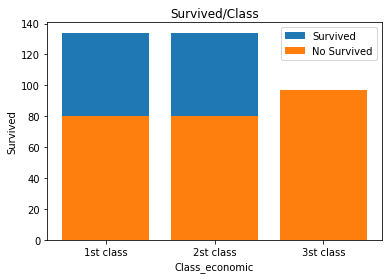

In [23]:
s_c = survive_n.groupby(['pclass','survived']).count()['name']
d_c = dead_n.groupby(['pclass','survived']).count()['name']

plt.title('Survived/Class')
sample_s = [s_c[0],s_c[1],s_c[2]]
labels_s = ["1st class","2st class","3st class"]
plt.bar(labels_s,sample_s);
plt.xlabel("Class_economic")
plt.ylabel("Survived")

labels = ['1st class','2st class','3st class']

surv = ['Survived','No Survived']
sample_s = [d_c[0],d_c[1],d_c[2]]
labels_s = ["1st class","2st class","3st class"]
plt.bar(labels_s,sample_s);

plt.legend(surv);

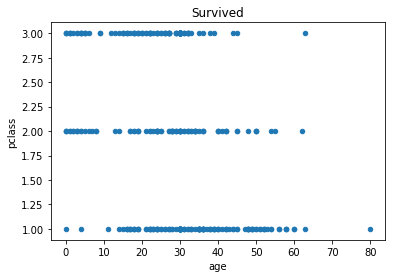

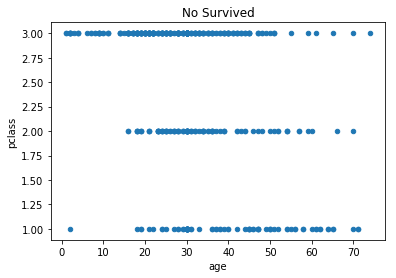

In [24]:
survive_n.plot(kind='scatter',x = 'age',y='pclass',title= "Survived");
dead_n.plot(kind='scatter',x='age',y ='pclass',title='No Survived');


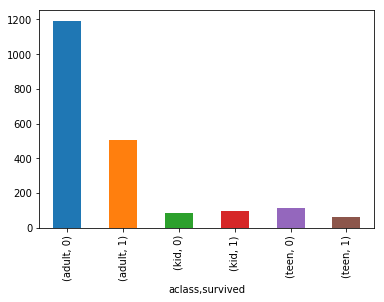

In [25]:
df_t.groupby(['aclass','survived',]).sum()['pclass'].plot(kind='bar')

# .
P2: Qual porto houve mais desembarque classificado por idade media e genero dos tripulantes ?

Text(0,0.5,'Age_Mean')

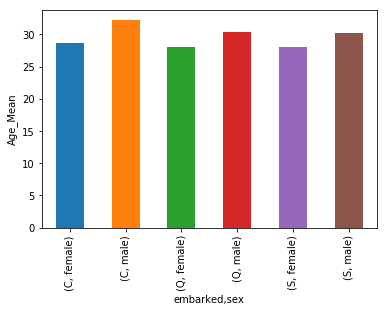

In [26]:
kid = df_t.query('age < 18')['embarked']
kid.shape
adult = df_t.query('age >= 18')['embarked']
adult.shape

df_t.groupby(['embarked','sex']).mean()['age'].plot(kind='bar')
plt.ylabel('Age_Mean')

# .
P3: Qual o nome do tripulante que perdeu mais familiares no navio ?

In [27]:
df_search = df_t.query('sibsp > 0 and parch > 0 and survived == 0').max()
print('O nome do tripulante se chama: {}\nTotal de familiares mortos: {}'.format(df_search['name'],(df_search['sibsp']+df_search['parch'])))


O nome do tripulante se chama: West, Mr. Edwy Arthur
Total de familiares mortos: 14


# .
P4: Quais foram os fatores que fizeram com que algumas pessoas fossem mais propensas a sobreviver?


Quantidade de pessoas desesperada pela sobrevivencia, do sexo masculino da terceira class.


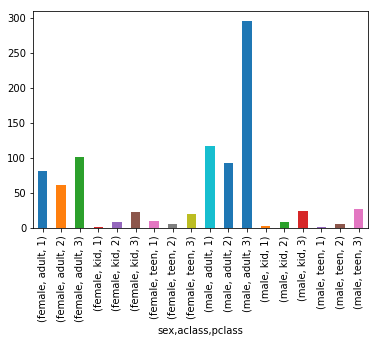

In [33]:
df_t.groupby(['sex','aclass','pclass']).count()['survived'].plot(kind='bar')
print('')
print('Quantidade de pessoas desesperada pela sobrevivencia, do sexo masculino da terceira class.')
